# Louisiana - Analysis

## Required Packages

In [1]:
# For working with graphs
import networkx as nx
# For making plots
import matplotlib.pyplot as plt
import numpy as np

# Needed for gerrchain
import gerrychain   
from gerrychain import Graph, Partition, proposals, updaters, constraints, accept, MarkovChain, GeographicPartition
from gerrychain.updaters import cut_edges, Tally
from gerrychain.tree import recursive_tree_part
from gerrychain.proposals import recom
from gerrychain.accept import always_accept
from functools import partial
import geopandas as gpd
import pandas as pd

# To fix any data issues
import maup
from maup import smart_repair

## Repair the Shapefile

In [2]:
# Read the shapefile data into a GeoDataFrame and a Graph
la_gdf = gpd.read_file("Louisiana_precincts_with_data/Louisiana_precincts_with_data.shp")
# Check geodataframe using maup's doctor function
maup.doctor(la_gdf)

/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/maup/repair.py:331: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  overlaps = inters[inters.area > 0].make_valid()


There are 10 overlaps.
There are 3 holes.
There are some invalid geometries.


False

In [3]:
# Repair invalid geometries using buffer
la_gdf.loc[~la_gdf['geometry'].is_valid, 'geometry'] = la_gdf.loc[~la_gdf['geometry'].is_valid, 'geometry'].buffer(0)

In [4]:
original_crs = la_gdf.crs

la_gdf = la_gdf.to_crs(la_gdf.estimate_utm_crs())

la_gdf = smart_repair(la_gdf)

la_gdf = la_gdf.to_crs(original_crs)

/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/maup/smart_repair.py:95: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["geometry"][i] = shapely.wkb.loads(
/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/maup/s

Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.


/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/maup/smart_repair.py:372: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pieces_df["polygon indices"][i] = set()


Identifying overlaps...


/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/maup/smart_repair.py:415: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pieces_df["polygon indices"][i] = pieces_df["polygon indices"][i].union({j})


Resolving overlaps...


/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/maup/smart_repair.py:487: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["geometry"][this_poly_ind] = unary_union([geometries_df["geometry"][this_poly_ind], this_piece])
/

Assigning order 2 pieces...


/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/maup/smart_repair.py:563: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["geometry"][poly_to_add_to] = unary_union(


Filling gaps...


Gaps to simplify:   0%|          | 0/3 [00:00<?, ?it/s]/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/maup/smart_repair.py:1207: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  holes_df.geometry[h_ind] = orient(holes_df.geometry[h_in

In [5]:
# Check geodataframe using maup's doctor function
maup.doctor(la_gdf)

/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/maup/repair.py:331: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  overlaps = inters[inters.area > 0].make_valid()


True

In [6]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

la_gdf.rename(columns={'OriginalPl': 'Original_CD', "NewPlan": "Adopted_CD", "P1_001N": "Total Population", "P1_002N": "1RPop", "P1_003N": "WPOP", "P1_004N": "BPOP", "P1_005N": "NPOP", "P1_006N": "APOP", "P1_007N": "PIPOP", "P1_008N": "Other"}, inplace=True)

print(la_gdf.columns)

Index(['UNIQUE_ID', 'COUNTYFP', 'Parish', 'Precinct', 'G22USSDCHA',
       'G22USSDMEN', 'G22USSDMIX', 'G22USSDROD', 'G22USSDSTE', 'G22USSRGRA',
       'G22USSRKEN', 'Original_C', 'Adopted_CD', 'Total Population', '1RPop',
       'WPOP', 'BPOP', 'NPOP', 'APOP', 'PIPOP', 'Other', 'geometry'],
      dtype='object')


In [7]:
la_gdf.rename(columns={"Original_C": "Original_CD"})

print(la_gdf.columns)

Index(['UNIQUE_ID', 'COUNTYFP', 'Parish', 'Precinct', 'G22USSDCHA',
       'G22USSDMEN', 'G22USSDMIX', 'G22USSDROD', 'G22USSDSTE', 'G22USSRGRA',
       'G22USSRKEN', 'Original_C', 'Adopted_CD', 'Total Population', '1RPop',
       'WPOP', 'BPOP', 'NPOP', 'APOP', 'PIPOP', 'Other', 'geometry'],
      dtype='object')


In [8]:
# Works (but not recommended)
la_gdf.rename(columns={'Original_C':'Original_CD'}, inplace=True)
print(la_gdf.columns)

Index(['UNIQUE_ID', 'COUNTYFP', 'Parish', 'Precinct', 'G22USSDCHA',
       'G22USSDMEN', 'G22USSDMIX', 'G22USSDROD', 'G22USSDSTE', 'G22USSRGRA',
       'G22USSRKEN', 'Original_CD', 'Adopted_CD', 'Total Population', '1RPop',
       'WPOP', 'BPOP', 'NPOP', 'APOP', 'PIPOP', 'Other', 'geometry'],
      dtype='object')


In [9]:
# We need to combine all the D candidates and all the R candidates
la_gdf["G22USSD"] = la_gdf["G22USSDCHA"] + la_gdf["G22USSDMEN"] + la_gdf["G22USSDMIX"] + la_gdf["G22USSDROD"]
la_gdf["G22USSR"] = la_gdf["G22USSRGRA"] + la_gdf["G22USSRKEN"]

In [10]:
la_gdf.columns

Index(['UNIQUE_ID', 'COUNTYFP', 'Parish', 'Precinct', 'G22USSDCHA',
       'G22USSDMEN', 'G22USSDMIX', 'G22USSDROD', 'G22USSDSTE', 'G22USSRGRA',
       'G22USSRKEN', 'Original_CD', 'Adopted_CD', 'Total Population', '1RPop',
       'WPOP', 'BPOP', 'NPOP', 'APOP', 'PIPOP', 'Other', 'geometry', 'G22USSD',
       'G22USSR'],
      dtype='object')

In [11]:
la_graph = Graph.from_geodataframe(la_gdf, ignore_errors=True)

/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/gerrychain/graph/graph.py:266: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas = df.geometry.area.to_dict()


## What do the Current Maps Look Like?

### Original Plan

<Axes: >

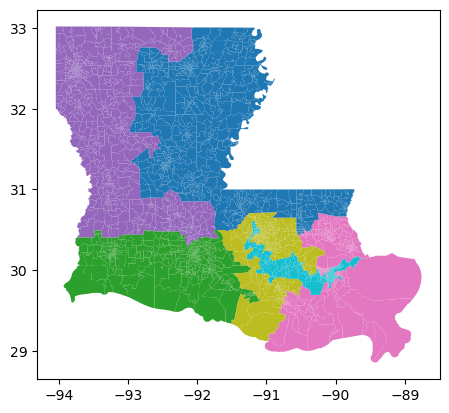

In [12]:
la_gdf.plot(column = "Original_CD", cmap = 'tab10')

### Adopted Plan

<Axes: >

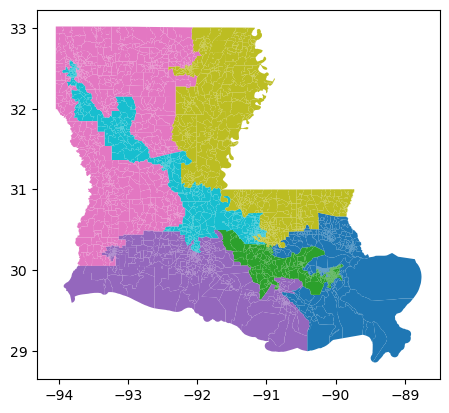

In [13]:
la_gdf.plot(column = "Adopted_CD", cmap = 'tab10')

### Current Population

<Axes: >

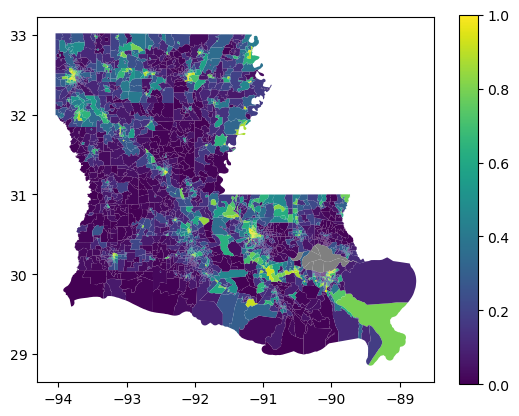

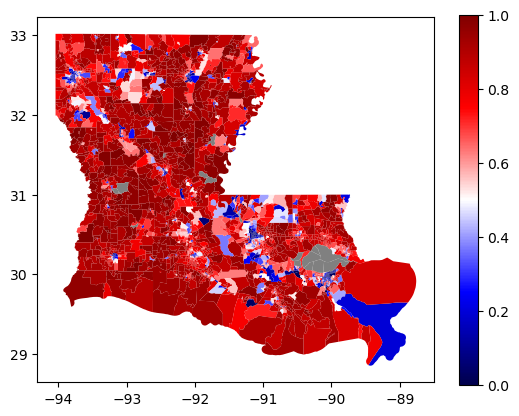

In [14]:
# Plot the black population percentage by precincts
la_gdf['b_frac'] = pd.to_numeric(la_gdf['BPOP'])/pd.to_numeric(la_gdf['Total Population'])
la_gdf.plot(column = 'b_frac', missing_kwds = {"color":"grey"}, legend=True)

# Plot the Presidentail republican votes by precincts
la_gdf['pref_party'] = pd.to_numeric(la_gdf['G22USSR'])/pd.to_numeric(la_gdf["G22USSR"] + la_gdf["G22USSD"])
la_gdf.plot(column = 'pref_party', missing_kwds = {"color":"grey"}, cmap = "seismic", legend=True)


## Getting Ready for the Ensemble Analysis

In [15]:
# Get the information at the Nodes
print("Information at Nodes: ", la_graph.nodes()[0].keys())
# Get the total population of Louisiana
tot_pop = sum([la_graph.nodes()[v]['Total Population'] for v in la_graph.nodes()])
print("Total Population: ", tot_pop)

Information at Nodes:  dict_keys(['boundary_node', 'area', 'UNIQUE_ID', 'COUNTYFP', 'Parish', 'Precinct', 'G22USSDCHA', 'G22USSDMEN', 'G22USSDMIX', 'G22USSDROD', 'G22USSDSTE', 'G22USSRGRA', 'G22USSRKEN', 'Original_CD', 'Adopted_CD', 'Total Population', '1RPop', 'WPOP', 'BPOP', 'NPOP', 'APOP', 'PIPOP', 'Other', 'geometry', 'G22USSD', 'G22USSR'])
Total Population:  4657757


In [16]:
num_dist = 6 # Number of Congressional Districts in Arkansas
ideal_pop = tot_pop/num_dist #tot_pop is calculated in the previous cell
pop_tolerance = 0.01 #how much variance we want in the population of each district

## Ensemble Analysis

### From the Original Plan

In [17]:
# create the originalplan
init_plan = GeographicPartition(la_graph, assignment = "Original_CD")

# confirm that this worked
print(init_plan)

<GeographicPartition [6 parts]>


In [18]:
# create the initial partition
initial_partition = Partition(
    la_graph,
    assignment = init_plan.assignment,
    updaters = 
    {   "cut edges": cut_edges ,
        "district population": Tally("Total Population", alias = "district population"),
        "district BPOP": Tally("BPOP", alias = "district BPOP"),
        "R Votes": Tally("G22USSR", alias = "R Votes"), 
        "D Votes": Tally("G22USSD", alias = "D Votes"),
    }
)

In [19]:
# How many democratic districts does our initial plan have?
d = 0
for i in range(num_dist): 
    if initial_partition["R Votes"][i] < initial_partition["D Votes"][i]:
        d += 1

print("Number of Democratic Districts: ", d)

Number of Democratic Districts:  1


In [20]:
# how to take a step
rw_proposal = partial(recom, ## how you choose a next districting plan
                      pop_col = "Total Population", ## What data describes population? 
                      pop_target = ideal_pop, ## What the target/ideal population is for each district 
                                              ## (we calculated ideal pop above)
                      epsilon = pop_tolerance,  ## how far from ideal population you can deviate
                                              ## (we set pop_tolerance above)
                      node_repeats = 1 ## number of times to repeat bipartition.  Can increase if you get a BipartitionWarning
                      )

In [21]:
# We need to ensure that there is a population constraint
population_constraint = constraints.within_percent_of_ideal_population(
    initial_partition, 
    pop_tolerance, 
    pop_key = "district population"
    )

In [22]:
# This will set up the walk, but not actually run it.
la_random_walk = MarkovChain(
    proposal = rw_proposal, 
    constraints = [population_constraint],
    accept = always_accept, # accepts every proposed plan that meets population criteria
    initial_state = initial_partition, 
    total_steps = 20000
)

In [23]:
# Now run it!
cutedge_ensemble_a = []
bmaj_ensemble_a = []
d_ensemble_a = [] 
bpop_a = [] 
dvpop_a = []

for part in la_random_walk:
    # Add cutedges to cutedges ensemble
    cutedge_ensemble_a.append(len(part["cut edges"]))
    
    # Calculate number of Districts with at least 40 BPOP%
    # Add to ensemble
    num_maj_black = 0
    for i in range(num_dist):
        b_perc = part["district BPOP"][i]/part["district population"][i]
        if b_perc >= 0.4: 
            num_maj_black = num_maj_black + 1
    bmaj_ensemble_a.append(num_maj_black)

    # Calculate number of districts with more Democratic votes than Republican votes
    d = 0
    for i in range(num_dist):
        if part["R Votes"][i] < part["D Votes"][i]: 
            d = d + 1
    d_ensemble_a.append(d)

    # Calculate the percentage of black population for each district at each step
    bpop_this_step = []
    for i in range(num_dist):
        b_perc = part["district BPOP"][i]/ part["district population"][i]
        bpop_this_step.append(b_perc)
    bpop_this_step.sort()
    bpop_a.append(bpop_this_step)

    # Calculate the percentage of democratic voters for each district at each step
    dv_this_step = []
    for i in range(num_dist):
        dv_perc = part["D Votes"][i]/ (part["D Votes"][i] + part["R Votes"][i])
        dv_this_step.append(dv_perc)
    dv_this_step.sort()
    dvpop_a.append(dv_this_step)

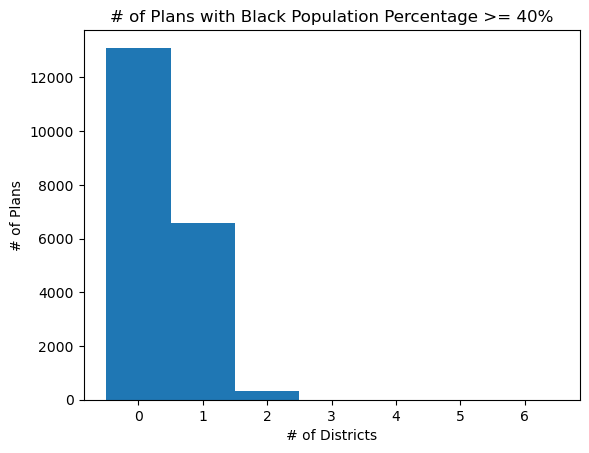

In [24]:
plt.figure()
plt.hist(bmaj_ensemble_a, align = 'left', bins = [0,1,2,3,4,5,6,7])
plt.title("# of Plans with Black Population Percentage >= 40%")
plt.xlabel("# of Districts")
plt.ylabel("# of Plans")

# Save the figure as a PNG file
plt.savefig('./graphics/la_orig10_b_bar.png', dpi=300, bbox_inches='tight')

plt.show()

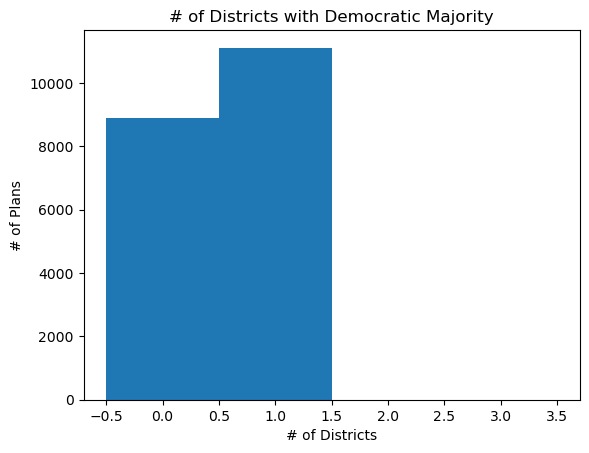

In [25]:

plt.figure()
plt.title("# of Districts with Democratic Majority")
plt.xlabel("# of Districts")
plt.ylabel("# of Plans")
plt.hist(d_ensemble_a, align = "left", bins = [0, 1, 2, 3, 4])

# Save the figure as a PNG file
plt.savefig('./graphics/la_orig10_d_bar.png', dpi=300, bbox_inches='tight')

plt.show()

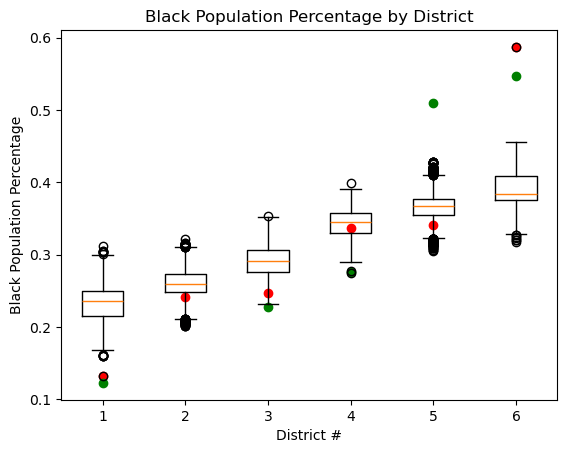

In [26]:
a = np.array(bpop_a)

# ORIGINAL CD
#Calculate District Black and Population for Original CD
dist_bpop = [0] * num_dist
dist_pop = [0] * num_dist
dist_frac = [0] * num_dist
dist_bpop_adopt = [0] * num_dist
dist_pop_adopt = [0] * num_dist
dist_frac_adopt = [0] * num_dist

for v in la_graph.nodes(): 
    dist = int(la_graph.nodes()[v]["Original_CD"])-1 # Because districts are indesed starting at 1, not 0
    dist_bpop[dist] = dist_bpop[dist] + la_graph.nodes()[v]["BPOP"]
    dist_pop[dist] = dist_pop[dist] + la_graph.nodes()[v]["Total Population"]

# Calculate BPOP Fraction for each district, sort it
dist_frac = [dist_bpop[i]/dist_pop[i] for i in range(num_dist)]
dist_frac.sort()

# ADOPTED CD
#Calculate District Black and Population for Original CD
dist_bpop_adopt = [0] * num_dist
dist_pop_adopt = [0] * num_dist
dist_frac_adopt = [0] * num_dist

for v in la_graph.nodes(): 
    dist = int(la_graph.nodes()[v]["Adopted_CD"])-1 # Because districts are indesed starting at 1, not 0
    dist_bpop_adopt[dist] = dist_bpop_adopt[dist] + la_graph.nodes()[v]["BPOP"]
    dist_pop_adopt[dist] = dist_pop_adopt[dist] + la_graph.nodes()[v]["Total Population"]

# Calculate BPOP Fraction for each district, sort it
dist_frac_adopt = [dist_bpop_adopt[i]/dist_pop_adopt[i] for i in range(num_dist)]
dist_frac_adopt.sort()

# plot points on top of boxplot
plt.figure()
plt.boxplot(a)
plt.scatter(x = range(1, num_dist + 1), y = dist_frac, color = "red" )
plt.scatter(x = range(1, num_dist + 1), y = dist_frac_adopt, color = "green" )
plt.title("Black Population Percentage by District")
plt.xlabel("District #")
plt.ylabel("Black Population Percentage")

# Save the figure as a PNG file
plt.savefig('./graphics/la_orig10_b_box.png', dpi=300, bbox_inches='tight')

plt.show()

[0.24333424833013084, 0.25919214892385106, 0.27786271863552603, 0.3001010860985843, 0.3016026567165429, 0.7138546257834713]


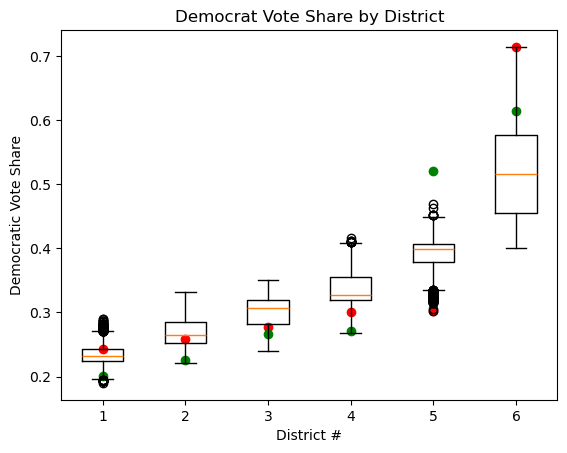

In [37]:
b = np.array(dvpop_a)
## ORIGINAL PLAN
#Calculate District Democratic Majority
dist_dmaj = [0] * num_dist
dist_votes = [0] * num_dist
dist_frac_d = [0] * num_dist

for v in la_graph.nodes(): 
    dist = int(la_graph.nodes()[v]["Original_CD"])-1 # Because districts are indesed starting at 1, not 0
    dist_dmaj[dist] = dist_dmaj[dist] + la_graph.nodes()[v]["G22USSD"]
    dist_votes[dist] = dist_votes[dist] + (la_graph.nodes()[v]["G22USSD"] + la_graph.nodes()[v]["G22USSR"])

# Calculate Democratic Fraction for each district, sort it
dist_frac_d = [dist_dmaj[i]/dist_votes[i] for i in range(num_dist)]
dist_frac_d.sort()
print(dist_frac_d)


## ADOPTED PLAN
#Calculate District Democratic Majority
dist_dmaj_adopt = [0] * num_dist
dist_votes_adopt = [0] * num_dist
dist_frac_d_adopt = [0] * num_dist

for v in la_graph.nodes(): 
    dist = int(la_graph.nodes()[v]["Adopted_CD"])-1 # Because districts are indesed starting at 1, not 0
    dist_dmaj_adopt[dist] = dist_dmaj_adopt[dist] + la_graph.nodes()[v]["G22USSD"]
    dist_votes_adopt[dist] = dist_votes_adopt[dist] + (la_graph.nodes()[v]["G22USSD"] + la_graph.nodes()[v]["G22USSR"])

# Calculate Democratic Fraction for each district, sort it
dist_frac_d_adopt = [dist_dmaj_adopt[i]/dist_votes_adopt[i] for i in range(num_dist)]
dist_frac_d_adopt.sort()

# plot points on top of boxplot
plt.figure()
plt.scatter(x = range(1, num_dist + 1), y = dist_frac_d, color = "red" )
plt.scatter(x = range(1, num_dist + 1), y = dist_frac_d_adopt, color = "green")

# Plot it finally!
plt.boxplot(b)
plt.title("Democrat Vote Share by District")
plt.xlabel("District #")
plt.ylabel("Democratic Vote Share")

# Save the figure as a PNG file
plt.savefig('./graphics/la_orig10_d_box.png', dpi=300, bbox_inches='tight')

plt.show()

### From the Original Plan - Ran for Double

In [38]:
# create the initial partition
initial_partition = Partition(
    la_graph,
    assignment = init_plan.assignment,
    updaters = 
    {   "cut edges": cut_edges ,
        "district population": Tally("Total Population", alias = "district population"),
        "district BPOP": Tally("BPOP", alias = "district BPOP"),
        "R Votes": Tally("G22USSR", alias = "R Votes"), 
        "D Votes": Tally("G22USSD", alias = "D Votes"),
    }
)

In [39]:
# How many democratic districts does our initial plan have?
d = 0
for i in range(num_dist): 
    if initial_partition["R Votes"][i] < initial_partition["D Votes"][i]:
        d += 1

print("Number of Democratic Districts: ", d)

Number of Democratic Districts:  1


In [40]:
# how to take a step
rw_proposal = partial(recom, ## how you choose a next districting plan
                      pop_col = "Total Population", ## What data describes population? 
                      pop_target = ideal_pop, ## What the target/ideal population is for each district 
                                              ## (we calculated ideal pop above)
                      epsilon = pop_tolerance,  ## how far from ideal population you can deviate
                                              ## (we set pop_tolerance above)
                      node_repeats = 1 ## number of times to repeat bipartition.  Can increase if you get a BipartitionWarning
                      )

In [41]:
# We need to ensure that there is a population constraint
population_constraint = constraints.within_percent_of_ideal_population(
    initial_partition, 
    pop_tolerance, 
    pop_key = "district population"
    )

In [42]:
# This will set up the walk, but not actually run it.
la_random_walk = MarkovChain(
    proposal = rw_proposal, 
    constraints = [population_constraint],
    accept = always_accept, # accepts every proposed plan that meets population criteria
    initial_state = initial_partition, 
    total_steps = 40000
)

In [43]:
# Now run it!
cutedge_ensemble_b = []
bmaj_ensemble_b = []
d_ensemble_b = [] 
bpop_b = [] 
dvpop_b = []

for part in la_random_walk:
    # Add cutedges to cutedges ensemble
    cutedge_ensemble_b.append(len(part["cut edges"]))
    
    # Calculate number of Districts with at least 40 BPOP%
    # Add to ensemble
    num_maj_black = 0
    for i in range(num_dist):
        b_perc = part["district BPOP"][i]/part["district population"][i]
        if b_perc >= 0.4: 
            num_maj_black = num_maj_black + 1
    bmaj_ensemble_b.append(num_maj_black)

    # Calculate number of districts with more Democratic votes than Republican votes
    d = 0
    for i in range(num_dist):
        if part["R Votes"][i] < part["D Votes"][i]: 
            d = d + 1
    d_ensemble_b.append(d)

    # Calculate the percentage of black population for each district at each step
    bpop_this_step = []
    for i in range(num_dist):
        b_perc = part["district BPOP"][i]/ part["district population"][i]
        bpop_this_step.append(b_perc)
    bpop_this_step.sort()
    bpop_b.append(bpop_this_step)

    # Calculate the percentage of democratic voters for each district at each step
    dv_this_step = []
    for i in range(num_dist):
        dv_perc = part["D Votes"][i]/(part["D Votes"][i] + part["R Votes"][i])
        dv_this_step.append(dv_perc)
    dv_this_step.sort()
    dvpop_b.append(dv_this_step)

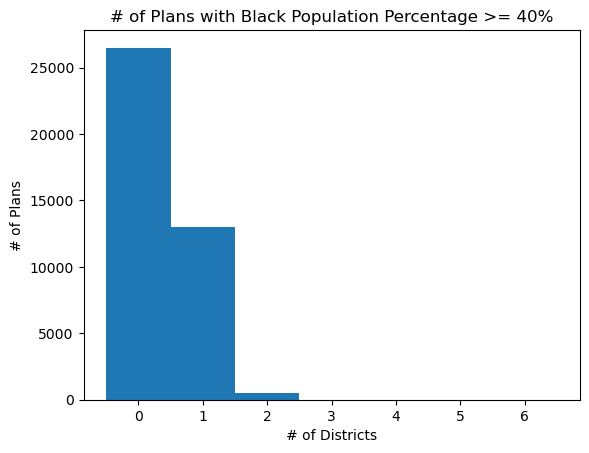

In [44]:
plt.figure()
plt.hist(bmaj_ensemble_b, align = 'left', bins = [0,1,2,3,4,5,6,7])
plt.title("# of Plans with Black Population Percentage >= 40%")
plt.xlabel("# of Districts")
plt.ylabel("# of Plans")

# Save the figure as a PNG file
plt.savefig('./graphics/la_orig20_b_bar.png', dpi=300, bbox_inches='tight')

plt.show()

[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 

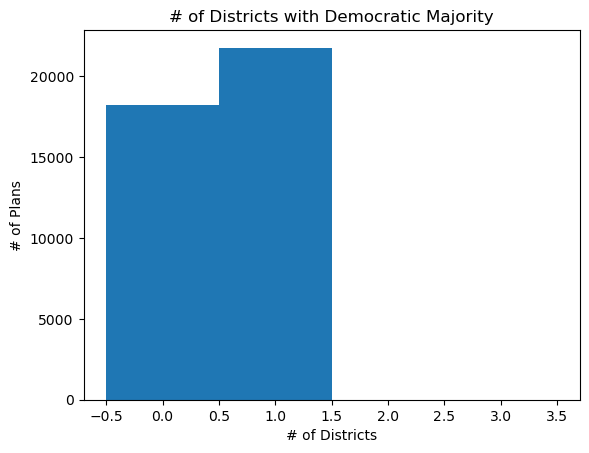

In [46]:
print(d_ensemble_b)
plt.figure()
plt.title("# of Districts with Democratic Majority")
plt.xlabel("# of Districts")
plt.ylabel("# of Plans")
plt.hist(d_ensemble_b, align = "left", bins = [0, 1, 2, 3, 4])

# Save the figure as a PNG file
plt.savefig('./graphics/la_orig20_d_bar.png', dpi=300, bbox_inches='tight')

plt.show()

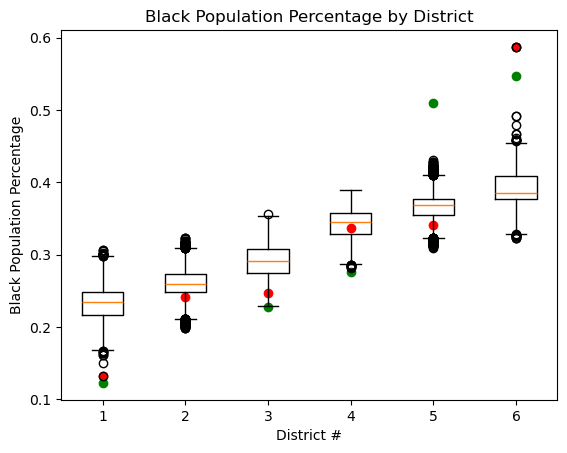

In [47]:
a = np.array(bpop_b)

# ORIGINAL CD
#Calculate District Black and Population for Original CD
dist_bpop = [0] * num_dist
dist_pop = [0] * num_dist
dist_frac = [0] * num_dist
dist_bpop_adopt = [0] * num_dist
dist_pop_adopt = [0] * num_dist
dist_frac_adopt = [0] * num_dist

for v in la_graph.nodes(): 
    dist = int(la_graph.nodes()[v]["Original_CD"])-1 # Because districts are indesed starting at 1, not 0
    dist_bpop[dist] = dist_bpop[dist] + la_graph.nodes()[v]["BPOP"]
    dist_pop[dist] = dist_pop[dist] + la_graph.nodes()[v]["Total Population"]

# Calculate BPOP Fraction for each district, sort it
dist_frac = [dist_bpop[i]/dist_pop[i] for i in range(num_dist)]
dist_frac.sort()

# ADOPTED CD
#Calculate District Black and Population for Original CD
dist_bpop_adopt = [0] * num_dist
dist_pop_adopt = [0] * num_dist
dist_frac_adopt = [0] * num_dist

for v in la_graph.nodes(): 
    dist = int(la_graph.nodes()[v]["Adopted_CD"])-1 # Because districts are indesed starting at 1, not 0
    dist_bpop_adopt[dist] = dist_bpop_adopt[dist] + la_graph.nodes()[v]["BPOP"]
    dist_pop_adopt[dist] = dist_pop_adopt[dist] + la_graph.nodes()[v]["Total Population"]

# Calculate BPOP Fraction for each district, sort it
dist_frac_adopt = [dist_bpop_adopt[i]/dist_pop_adopt[i] for i in range(num_dist)]
dist_frac_adopt.sort()

# plot points on top of boxplot
plt.figure()
plt.boxplot(a)
plt.scatter(x = range(1, num_dist + 1), y = dist_frac, color = "red" )
plt.scatter(x = range(1, num_dist + 1), y = dist_frac_adopt, color = "green" )
plt.title("Black Population Percentage by District")
plt.xlabel("District #")
plt.ylabel("Black Population Percentage")

# Save the figure as a PNG file
plt.savefig('./graphics/la_orig20_b_box.png', dpi=300, bbox_inches='tight')

plt.show()

[0.24333424833013084, 0.25919214892385106, 0.27786271863552603, 0.3001010860985843, 0.3016026567165429, 0.7138546257834713]


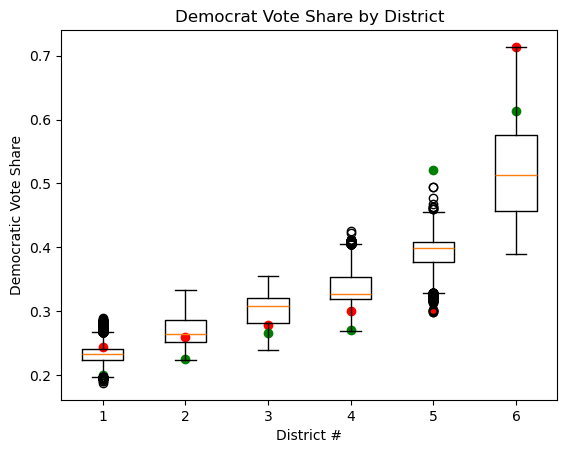

In [48]:
b = np.array(dvpop_b)

## ORIGINAL PLAN
#Calculate District Democratic Majority
dist_dmaj = [0] * num_dist
dist_votes = [0] * num_dist
dist_frac_d = [0] * num_dist

for v in la_graph.nodes(): 
    dist = int(la_graph.nodes()[v]["Original_CD"])-1 # Because districts are indesed starting at 1, not 0
    dist_dmaj[dist] = dist_dmaj[dist] + la_graph.nodes()[v]["G22USSD"]
    dist_votes[dist] = dist_votes[dist] + (la_graph.nodes()[v]["G22USSD"] + la_graph.nodes()[v]["G22USSR"])

# Calculate Democratic Fraction for each district, sort it
dist_frac_d = [dist_dmaj[i]/dist_votes[i] for i in range(num_dist)]
dist_frac_d.sort()
print(dist_frac_d)


## ADOPTED PLAN
#Calculate District Democratic Majority
dist_dmaj_adopt = [0] * num_dist
dist_votes_adopt = [0] * num_dist
dist_frac_d_adopt = [0] * num_dist

for v in la_graph.nodes(): 
    dist = int(la_graph.nodes()[v]["Adopted_CD"])-1 # Because districts are indesed starting at 1, not 0
    dist_dmaj_adopt[dist] = dist_dmaj_adopt[dist] + la_graph.nodes()[v]["G22USSD"]
    dist_votes_adopt[dist] = dist_votes_adopt[dist] + (la_graph.nodes()[v]["G22USSD"] + la_graph.nodes()[v]["G22USSR"])

# Calculate Democratic Fraction for each district, sort it
dist_frac_d_adopt = [dist_dmaj_adopt[i]/dist_votes_adopt[i] for i in range(num_dist)]
dist_frac_d_adopt.sort()

# plot points on top of boxplot
plt.figure()
plt.scatter(x = range(1, num_dist + 1), y = dist_frac_d, color = "red" )
plt.scatter(x = range(1, num_dist + 1), y = dist_frac_d_adopt, color = "green")

# Plot it finally!
plt.boxplot(b)
plt.title("Democrat Vote Share by District")
plt.xlabel("District #")
plt.ylabel("Democratic Vote Share")

# Save the figure as a PNG file
plt.savefig('./graphics/la_orig20_d_box.png', dpi=300, bbox_inches='tight')

plt.show()

### From a Randomly Generated Plan

In [49]:
random_plan = recursive_tree_part(la_graph, range(num_dist), ideal_pop, 'Total Population', pop_tolerance, 10) #use recursive tree part to create an initial plan

In [50]:
# create the initial partition
initial_partition = Partition(
    la_graph,
    assignment = random_plan,
    updaters = 
    {   "cut edges": cut_edges ,
        "district population": Tally("Total Population", alias = "district population"),
        "district BPOP": Tally("BPOP", alias = "district BPOP"),
        "R Votes": Tally("G22USSR", alias = "R Votes"), 
        "D Votes": Tally("G22USSD", alias = "D Votes"),
    }
)

In [51]:
# How many democratic districts does our initial plan have?
d = 0
for i in range(num_dist): 
    if initial_partition["R Votes"][i] < initial_partition["D Votes"][i]:
        d += 1

print("Number of Democratic Districts: ", d)

Number of Democratic Districts:  0


In [52]:
# how to take a step
rw_proposal = partial(recom, ## how you choose a next districting plan
                      pop_col = "Total Population", ## What data describes population? 
                      pop_target = ideal_pop, ## What the target/ideal population is for each district 
                                              ## (we calculated ideal pop above)
                      epsilon = pop_tolerance,  ## how far from ideal population you can deviate
                                              ## (we set pop_tolerance above)
                      node_repeats = 1 ## number of times to repeat bipartition.  Can increase if you get a BipartitionWarning
                      )

In [53]:
# We need to ensure that there is a population constraint
population_constraint = constraints.within_percent_of_ideal_population(
    initial_partition, 
    pop_tolerance, 
    pop_key = "district population"
    )

In [54]:
# This will set up the walk, but not actually run it.
la_random_walk = MarkovChain(
    proposal = rw_proposal, 
    constraints = [population_constraint],
    accept = always_accept, # accepts every proposed plan that meets population criteria
    initial_state = initial_partition, 
    total_steps = 40000
)

In [55]:
# Now run it!
cutedge_ensemble_c = []
bmaj_ensemble_c = []
d_ensemble_c = [] 
bpop_c = [] 
dvpop_c = []

for part in la_random_walk:
    # Add cutedges to cutedges ensemble
    cutedge_ensemble_c.append(len(part["cut edges"]))
    
    # Calculate number of Districts with at least 40 BPOP%
    # Add to ensemble
    num_maj_black = 0
    for i in range(num_dist):
        b_perc = part["district BPOP"][i]/part["district population"][i]
        if b_perc >= 0.4: 
            num_maj_black = num_maj_black + 1
    bmaj_ensemble_c.append(num_maj_black)

    # Calculate number of districts with more Democratic votes than Republican votes
    d = 0
    for i in range(num_dist):
        if part["R Votes"][i] < part["D Votes"][i]: 
            d = d + 1
    d_ensemble_c.append(d)

    # Calculate the percentage of black population for each district at each step
    bpop_this_step = []
    for i in range(num_dist):
        b_perc = part["district BPOP"][i]/ part["district population"][i]
        bpop_this_step.append(b_perc)
    bpop_this_step.sort()
    bpop_c.append(bpop_this_step)

    # Calculate the percentage of democratic voters for each district at each step
    dv_this_step = []
    for i in range(num_dist):
        dv_perc = part["D Votes"][i]/ (part["D Votes"][i] + part["R Votes"][i])
        dv_this_step.append(dv_perc)
    dv_this_step.sort()
    dvpop_c.append(dv_this_step)

KeyboardInterrupt: 

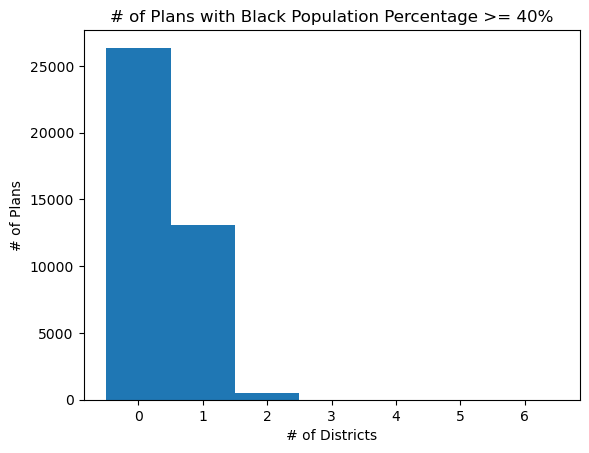

In [ ]:
plt.figure()
plt.hist(bmaj_ensemble_c, align = 'left', bins = [0,1,2,3,4,5,6,7])
plt.title("# of Plans with Black Population Percentage >= 40%")
plt.xlabel("# of Districts")
plt.ylabel("# of Plans")

# Save the figure as a PNG file
plt.savefig('./graphics/la_rand1_b_bar.png', dpi=300, bbox_inches='tight')

plt.show()

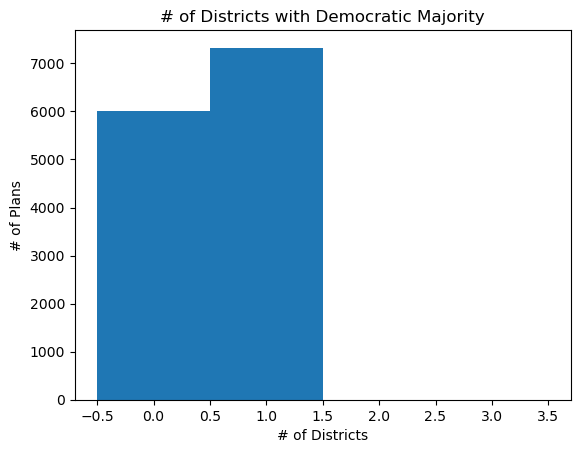

In [56]:

plt.figure()
plt.title("# of Districts with Democratic Majority")
plt.xlabel("# of Districts")
plt.ylabel("# of Plans")
plt.hist(d_ensemble_c, align = "left", bins = [0, 1, 2, 3, 4])

# Save the figure as a PNG file
plt.savefig('./graphics/la_rand1_d_bar.png', dpi=300, bbox_inches='tight')

plt.show()

[[0.23720437 0.24927002 0.26995982 0.33041446 0.38737056 0.41276315]
 [0.23720437 0.24927002 0.26995982 0.34150118 0.38737056 0.40244045]
 [0.23720437 0.24927002 0.27554047 0.34150118 0.38108644 0.40244045]
 ...
 [0.23425705 0.25780998 0.32897556 0.32943322 0.33186185 0.40274331]
 [0.25682413 0.25780998 0.30734198 0.32897556 0.33186185 0.40274331]
 [0.20443066 0.25780998 0.32897556 0.33186185 0.36025826 0.40274331]]


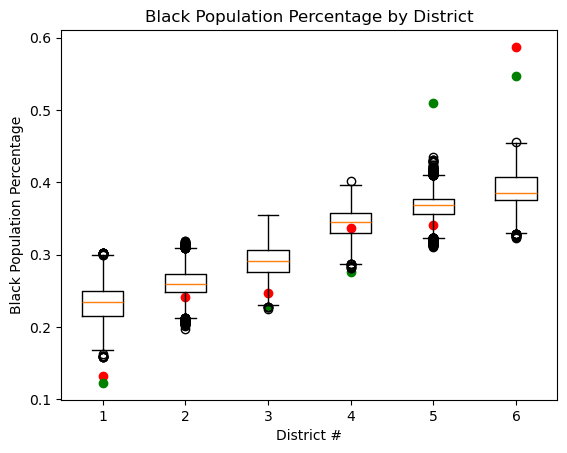

In [ ]:
a = np.array(bpop_c)

# ORIGINAL CD
#Calculate District Black and Population for Original CD
dist_bpop = [0] * num_dist
dist_pop = [0] * num_dist
dist_frac = [0] * num_dist
dist_bpop_adopt = [0] * num_dist
dist_pop_adopt = [0] * num_dist
dist_frac_adopt = [0] * num_dist

for v in la_graph.nodes(): 
    dist = int(la_graph.nodes()[v]["Original_CD"])-1 # Because districts are indesed starting at 1, not 0
    dist_bpop[dist] = dist_bpop[dist] + la_graph.nodes()[v]["BPOP"]
    dist_pop[dist] = dist_pop[dist] + la_graph.nodes()[v]["Total Population"]

# Calculate BPOP Fraction for each district, sort it
dist_frac = [dist_bpop[i]/dist_pop[i] for i in range(num_dist)]
dist_frac.sort()

# ADOPTED CD
#Calculate District Black and Population for Original CD
dist_bpop_adopt = [0] * num_dist
dist_pop_adopt = [0] * num_dist
dist_frac_adopt = [0] * num_dist

for v in la_graph.nodes(): 
    dist = int(la_graph.nodes()[v]["Adopted_CD"])-1 # Because districts are indesed starting at 1, not 0
    dist_bpop_adopt[dist] = dist_bpop_adopt[dist] + la_graph.nodes()[v]["BPOP"]
    dist_pop_adopt[dist] = dist_pop_adopt[dist] + la_graph.nodes()[v]["Total Population"]

# Calculate BPOP Fraction for each district, sort it
dist_frac_adopt = [dist_bpop_adopt[i]/dist_pop_adopt[i] for i in range(num_dist)]
dist_frac_adopt.sort()

# plot points on top of boxplot
plt.figure()
plt.boxplot(a)
plt.scatter(x = range(1, num_dist + 1), y = dist_frac, color = "red" )
plt.scatter(x = range(1, num_dist + 1), y = dist_frac_adopt, color = "green" )
plt.title("Black Population Percentage by District")
plt.xlabel("District #")
plt.ylabel("Black Population Percentage")

# Save the figure as a PNG file
plt.savefig('./graphics/la_rand1_b_box.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
b = np.array(dvpop_c)
## ORIGINAL PLAN
#Calculate District Democratic Majority
dist_dmaj = [0] * num_dist
dist_votes = [0] * num_dist
dist_frac_d = [0] * num_dist

for v in la_graph.nodes(): 
    dist = int(la_graph.nodes()[v]["Original_CD"])-1 # Because districts are indesed starting at 1, not 0
    dist_dmaj[dist] = dist_dmaj[dist] + la_graph.nodes()[v]["G22USSD"]
    dist_votes[dist] = dist_votes[dist] + (la_graph.nodes()[v]["G22USSD"] + la_graph.nodes()[v]["G22USSR"])

# Calculate Democratic Fraction for each district, sort it
dist_frac_d = [dist_dmaj[i]/dist_votes[i] for i in range(num_dist)]
dist_frac_d.sort()
print(dist_frac_d)


## ADOPTED PLAN
#Calculate District Democratic Majority
dist_dmaj_adopt = [0] * num_dist
dist_votes_adopt = [0] * num_dist
dist_frac_d_adopt = [0] * num_dist

for v in la_graph.nodes(): 
    dist = int(la_graph.nodes()[v]["Adopted_CD"])-1 # Because districts are indesed starting at 1, not 0
    dist_dmaj_adopt[dist] = dist_dmaj_adopt[dist] + la_graph.nodes()[v]["G22USSD"]
    dist_votes_adopt[dist] = dist_votes_adopt[dist] + (la_graph.nodes()[v]["G22USSD"] + la_graph.nodes()[v]["G22USSR"])

# Calculate Democratic Fraction for each district, sort it
dist_frac_d_adopt = [dist_dmaj_adopt[i]/dist_votes_adopt[i] for i in range(num_dist)]
dist_frac_d_adopt.sort()

# plot points on top of boxplot
plt.figure()
plt.scatter(x = range(1, num_dist + 1), y = dist_frac_d, color = "red" )
plt.scatter(x = range(1, num_dist + 1), y = dist_frac_d_adopt, color = "green")

# Plot it finally!
plt.boxplot(b)
plt.title("Democrat Vote Share by District")
plt.xlabel("District #")
plt.ylabel("Democratic Vote Share")

# Save the figure as a PNG file
plt.savefig('./graphics/la_rand1_d_box.png', dpi=300, bbox_inches='tight')

plt.show()

### From A *Different* Randomly Generated Plan

In [ ]:
random_plan = recursive_tree_part(la_graph, range(num_dist), ideal_pop, 'Total Population', pop_tolerance, 10) #use recursive tree part to create an initial plan

In [ ]:
# create the initial partition
initial_partition = Partition(
    la_graph,
    assignment = random_plan,
    updaters = 
    {   "cut edges": cut_edges ,
        "district population": Tally("Total Population", alias = "district population"),
        "district BPOP": Tally("BPOP", alias = "district BPOP"),
        "R Votes": Tally("G22USSR", alias = "R Votes"), 
        "D Votes": Tally("G22USSD", alias = "D Votes"),
    }
)

In [ ]:
# How many democratic districts does our initial plan have?
d = 0
for i in range(num_dist): 
    if initial_partition["R Votes"][i] < initial_partition["D Votes"][i]:
        d += 1

print("Number of Democratic Districts: ", d)

Number of Democratic Districts:  1


In [ ]:
# how to take a step
rw_proposal = partial(recom, ## how you choose a next districting plan
                      pop_col = "Total Population", ## What data describes population? 
                      pop_target = ideal_pop, ## What the target/ideal population is for each district 
                                              ## (we calculated ideal pop above)
                      epsilon = pop_tolerance,  ## how far from ideal population you can deviate
                                              ## (we set pop_tolerance above)
                      node_repeats = 1 ## number of times to repeat bipartition.  Can increase if you get a BipartitionWarning
                      )

In [ ]:
# We need to ensure that there is a population constraint
population_constraint = constraints.within_percent_of_ideal_population(
    initial_partition, 
    pop_tolerance, 
    pop_key = "district population"
    )

In [ ]:
# This will set up the walk, but not actually run it.
la_random_walk = MarkovChain(
    proposal = rw_proposal, 
    constraints = [population_constraint],
    accept = always_accept, # accepts every proposed plan that meets population criteria
    initial_state = initial_partition, 
    total_steps = 40000
)

In [ ]:
# Now run it!
cutedge_ensemble_d = []
bmaj_ensemble_d = []
d_ensemble_d = [] 
bpop_d = [] 
dvpop_d = []

for part in la_random_walk:
    # Add cutedges to cutedges ensemble
    cutedge_ensemble_d.append(len(part["cut edges"]))
    
    # Calculate number of Districts with at least 40 BPOP%
    # Add to ensemble
    num_maj_black = 0
    for i in range(num_dist):
        b_perc = part["district BPOP"][i]/part["district population"][i]
        if b_perc >= 0.4: 
            num_maj_black = num_maj_black + 1
    bmaj_ensemble_d.append(num_maj_black)

    # Calculate number of districts with more Democratic votes than Republican votes
    d = 0
    for i in range(num_dist):
        if part["R Votes"][i] < part["D Votes"][i]: 
            d = d + 1
    d_ensemble_d.append(d)

    # Calculate the percentage of black population for each district at each step
    bpop_this_step = []
    for i in range(num_dist):
        b_perc = part["district BPOP"][i]/ part["district population"][i]
        bpop_this_step.append(b_perc)
    bpop_this_step.sort()
    bpop_d.append(bpop_this_step)

    # Calculate the percentage of democratic voters for each district at each step
    dv_this_step = []
    for i in range(num_dist):
        dv_perc = part["D Votes"][i]/ (part["D Votes"][i] + part["R Votes"][i])
        dv_this_step.append(dv_perc)
    dv_this_step.sort()
    dvpop_d.append(dv_this_step)

[489, 431, 413, 445, 443, 483, 450, 482, 477, 493, 451, 487, 434, 436, 524, 547, 601, 631, 570, 507, 571, 568, 607, 601, 572, 575, 584, 496, 600, 585, 588, 474, 516, 612, 596, 560, 537, 599, 592, 544, 628, 611, 615, 639, 489, 502, 525, 525, 472, 496, 511, 503, 560, 479, 554, 561, 596, 585, 610, 601, 616, 645, 598, 604, 610, 600, 543, 542, 549, 624, 622, 585, 555, 635, 608, 566, 557, 553, 564, 519, 483, 508, 613, 625, 623, 647, 612, 594, 546, 543, 538, 549, 560, 563, 534, 513, 397, 465, 384, 398, 392, 442, 470, 474, 433, 497, 496, 463, 526, 550, 555, 555, 549, 550, 533, 549, 504, 509, 482, 513, 562, 553, 546, 527, 508, 498, 489, 522, 469, 452, 417, 426, 457, 425, 455, 451, 454, 455, 482, 479, 483, 516, 539, 516, 485, 498, 483, 474, 500, 540, 525, 531, 514, 501, 467, 469, 457, 457, 452, 467, 432, 439, 526, 535, 547, 499, 542, 533, 526, 510, 545, 549, 565, 586, 598, 591, 577, 542, 512, 492, 487, 502, 479, 462, 514, 481, 493, 463, 448, 454, 475, 460, 466, 458, 443, 396, 461, 460, 395, 418,

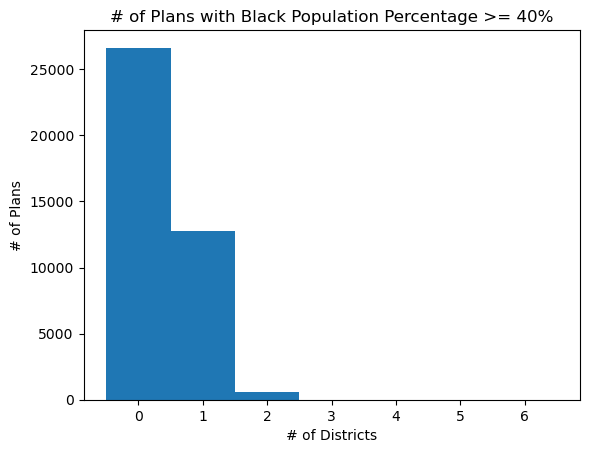

In [ ]:
plt.figure()
plt.hist(bmaj_ensemble_d, align = 'left', bins = [0,1,2,3,4,5,6,7])
plt.title("# of Plans with Black Population Percentage >= 40%")
plt.xlabel("# of Districts")
plt.ylabel("# of Plans")

# Save the figure as a PNG file
plt.savefig('./graphics/la_rand2_b_bar.png', dpi=300, bbox_inches='tight')

plt.show()

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 

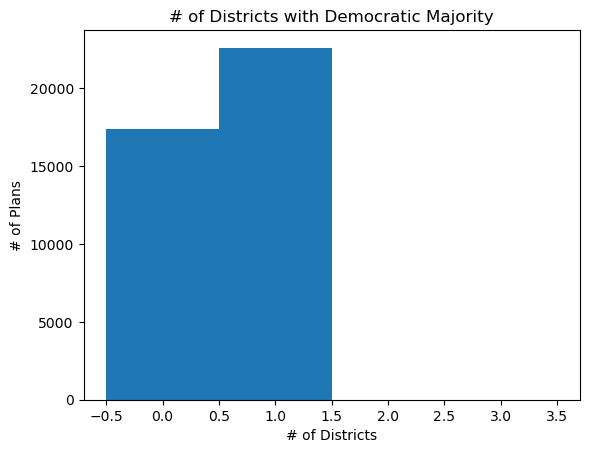

In [ ]:
print(d_ensemble)
plt.figure()
plt.title("# of Districts with Democratic Majority")
plt.xlabel("# of Districts")
plt.ylabel("# of Plans")
plt.hist(d_ensemble_d, align = "left", bins = [0, 1, 2, 3, 4])

# Save the figure as a PNG file
plt.savefig('./graphics/la_rand2_d_bar.png', dpi=300, bbox_inches='tight')

plt.show()

[[0.21337975 0.24953683 0.26096523 0.36866461 0.3845989  0.40879382]
 [0.21337975 0.2426272  0.26778098 0.36866461 0.3845989  0.40879382]
 [0.21821571 0.2426272  0.26308581 0.36866461 0.3845989  0.40879382]
 ...
 [0.25185993 0.2545559  0.27614532 0.35340207 0.36602686 0.38202322]
 [0.25185993 0.2545559  0.25704462 0.36602686 0.37327623 0.38202322]
 [0.22339517 0.2545559  0.25704462 0.36602686 0.38202322 0.40209485]]


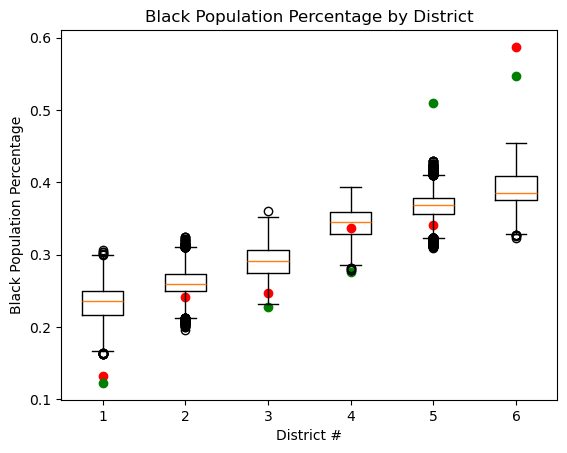

In [ ]:
a = np.array(bpop_d)

# ORIGINAL CD
#Calculate District Black and Population for Original CD
dist_bpop = [0] * num_dist
dist_pop = [0] * num_dist
dist_frac = [0] * num_dist
dist_bpop_adopt = [0] * num_dist
dist_pop_adopt = [0] * num_dist
dist_frac_adopt = [0] * num_dist

for v in la_graph.nodes(): 
    dist = int(la_graph.nodes()[v]["Original_CD"])-1 # Because districts are indesed starting at 1, not 0
    dist_bpop[dist] = dist_bpop[dist] + la_graph.nodes()[v]["BPOP"]
    dist_pop[dist] = dist_pop[dist] + la_graph.nodes()[v]["Total Population"]

# Calculate BPOP Fraction for each district, sort it
dist_frac = [dist_bpop[i]/dist_pop[i] for i in range(num_dist)]
dist_frac.sort()

# ADOPTED CD
#Calculate District Black and Population for Original CD
dist_bpop_adopt = [0] * num_dist
dist_pop_adopt = [0] * num_dist
dist_frac_adopt = [0] * num_dist

for v in la_graph.nodes(): 
    dist = int(la_graph.nodes()[v]["Adopted_CD"])-1 # Because districts are indesed starting at 1, not 0
    dist_bpop_adopt[dist] = dist_bpop_adopt[dist] + la_graph.nodes()[v]["BPOP"]
    dist_pop_adopt[dist] = dist_pop_adopt[dist] + la_graph.nodes()[v]["Total Population"]

# Calculate BPOP Fraction for each district, sort it
dist_frac_adopt = [dist_bpop_adopt[i]/dist_pop_adopt[i] for i in range(num_dist)]
dist_frac_adopt.sort()

# plot points on top of boxplot
plt.figure()
plt.boxplot(a)
plt.scatter(x = range(1, num_dist + 1), y = dist_frac, color = "red" )
plt.scatter(x = range(1, num_dist + 1), y = dist_frac_adopt, color = "green" )
plt.title("Black Population Percentage by District")
plt.xlabel("District #")
plt.ylabel("Black Population Percentage")

# Save the figure as a PNG file
plt.savefig('./graphics/la_rand2_b_box.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
b = np.array(dvpop_d)
## ORIGINAL PLAN
#Calculate District Democratic Majority
dist_dmaj = [0] * num_dist
dist_votes = [0] * num_dist
dist_frac_d = [0] * num_dist

for v in la_graph.nodes(): 
    dist = int(la_graph.nodes()[v]["Original_CD"])-1 # Because districts are indesed starting at 1, not 0
    dist_dmaj[dist] = dist_dmaj[dist] + la_graph.nodes()[v]["G22USSD"]
    dist_votes[dist] = dist_votes[dist] + (la_graph.nodes()[v]["G22USSD"] + la_graph.nodes()[v]["G22USSR"])

# Calculate Democratic Fraction for each district, sort it
dist_frac_d = [dist_dmaj[i]/dist_votes[i] for i in range(num_dist)]
dist_frac_d.sort()
print(dist_frac_d)


## ADOPTED PLAN
#Calculate District Democratic Majority
dist_dmaj_adopt = [0] * num_dist
dist_votes_adopt = [0] * num_dist
dist_frac_d_adopt = [0] * num_dist

for v in la_graph.nodes(): 
    dist = int(la_graph.nodes()[v]["Adopted_CD"])-1 # Because districts are indesed starting at 1, not 0
    dist_dmaj_adopt[dist] = dist_dmaj_adopt[dist] + la_graph.nodes()[v]["G22USSD"]
    dist_votes_adopt[dist] = dist_votes_adopt[dist] + (la_graph.nodes()[v]["G22USSD"] + la_graph.nodes()[v]["G22USSR"])

# Calculate Democratic Fraction for each district, sort it
dist_frac_d_adopt = [dist_dmaj_adopt[i]/dist_votes_adopt[i] for i in range(num_dist)]
dist_frac_d_adopt.sort()

# plot points on top of boxplot
plt.figure()
plt.scatter(x = range(1, num_dist + 1), y = dist_frac_d, color = "red" )
plt.scatter(x = range(1, num_dist + 1), y = dist_frac_d_adopt, color = "green")

# Plot it finally!
plt.boxplot(b)
plt.title("Democrat Vote Share by District")
plt.xlabel("District #")
plt.ylabel("Democratic Vote Share")

# Save the figure as a PNG file
plt.savefig('./graphics/la_rand2_d_box.png', dpi=300, bbox_inches='tight')

plt.show()

## How would the various plans affect the 2024 Election Results?

In [ ]:
la_init_gdf = gpd.read_file("HB1_Congress_221ES/HB1_Congress_221ES.shp")
la_adopt_gdf = gpd.read_file("Act_2_1st_ES_(2024)_-_Congress/Act_2_1st_ES_(2024)_-_Congress.shp")

In [ ]:
# Group by congressional district and calculate total votes for each candidate
district_totals = la_gdf.groupby('Original_CD')[['G22USSR', 'G22USSD']].sum()

# Determine the winning party in each district
district_totals['Winner-orig'] = np.where(district_totals['G22USSD'] > district_totals['G22USSR'], "Democrat", "Republican")

# Reset index to turn District back into a column (optional)
district_totals_orig = district_totals.reset_index()

print(district_totals_orig)

   Original_CD  G22USSR  G22USSD Winner-orig
0            0   161059    61972  Republican
1            1   165392    53188  Republican
2            2   151631    65016  Republican
3            3   177845    62224  Republican
4            4   166771    72020  Republican
5            5    54145   135077    Democrat


In [ ]:
# Count the number of districts won by each party
winner_summary_orig = district_totals_orig['Winner-orig'].value_counts()

print(winner_summary_orig)

Winner-orig
Republican    5
Democrat      1
Name: count, dtype: int64


In [ ]:
la_gdf = la_gdf.merge(district_totals_orig[["Original_CD", "Winner-orig"]], on='Original_CD', how='left')


<Axes: >

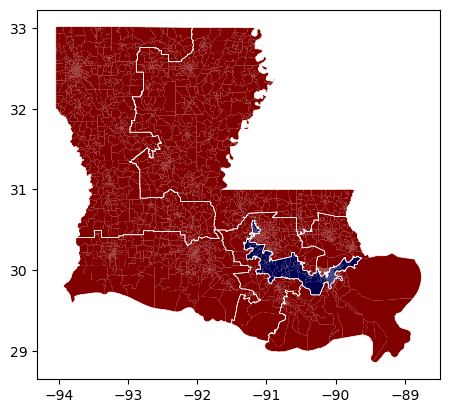

In [ ]:
fig, ax = plt.subplots()

# Plot the units with the vote percentage as color
la_gdf.plot(column = "Winner-orig", ax=ax, cmap = "seismic")

# Overlay districts
la_init_gdf.boundary.plot(ax=ax, color='white', linewidth=0.5)

In [ ]:
# Group by congressional district and calculate total votes for each candidate
district_totals = la_gdf.groupby('Adopted_CD')[['G22USSR', 'G22USSD']].sum()

# Determine the winning party in each district
district_totals['Winner-Adopt'] = np.where(district_totals['G22USSD'] > district_totals['G22USSR'], "Democrat", "Republican")

# Reset index to turn District back into a column (optional)
district_totals_adopt = district_totals.reset_index()

print(district_totals_adopt)

   Adopted_CD  G22USSR  G22USSD Winner-Adopt
0           1   185259    67045   Republican
1           2    74505   118545     Democrat
2           3   171341    49834   Republican
3           4   183538    45923   Republican
4           5   163236    60561   Republican
5           6    98964   107589     Democrat


In [ ]:
# Count the number of districts won by each party
winner_summary_adopt = district_totals_adopt['Winner-Adopt'].value_counts()

print(winner_summary_adopt)

Winner-Adopt
Republican    4
Democrat      2
Name: count, dtype: int64


In [ ]:
la_gdf = la_gdf.merge(district_totals_adopt[["Adopted_CD", "Winner-Adopt"]], on='Adopted_CD', how='left')


<Axes: >

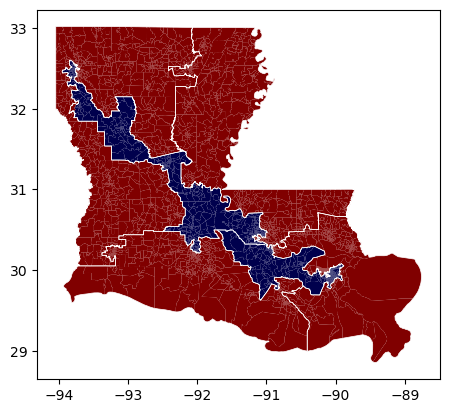

In [ ]:
fig, ax = plt.subplots()

# Plot the units with the vote percentage as color
la_gdf.plot(column = "Winner-Adopt", ax=ax, cmap = "seismic")

# Overlay districts
la_adopt_gdf.boundary.plot(ax=ax, color='white', linewidth=0.5)